## Inference with the Image-2-Text Model

### Installation

It's a bit hairy, since PyTorch released v2.0, but this wasn't developed with it. Should be ok, but I haven't tried it.

This is the environment under which the model was trained:  
* Make sure NVIDIA drivers are installed and up-to-date.
* [Install CUDA 1.7](https://developer.nvidia.com/cuda-11-7-0-download-archive)
* [Install PyTorch](https://pytorch.org/get-started/previous-versions/)

**NOTE:** The model is fairly large, not sure it will fit on a 4Gb card

The line below should install everything that is required, but I haven't tested it on machines other than mine, so...

In [ ]:
!pip install -r ../train/requirements.txt

In [2]:
import torch
from PIL import Image
from transformers import GitProcessor, GitForCausalLM

### Logon to HuggingFace
Download the model artifact from HuggingFace. The model is cached locally for future downloads.

Grab your token by [creating it here](https://huggingface.co/settings/tokens). You need a __personal__ token for this, the organization one won't work

You can login to HuggingFace by executing the cell below.

In [3]:
from huggingface_hub import notebook_login
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (manager-core).
Your token has been saved to C:\Users\berno\.cache\huggingface\token
Login successful


If this doesn't work, the APIs below take a `use_auth_token` argument and you can paste it there directly:
```python
model = GitForCausalLM.from_pretrained(input_model_repo, use_auth_token=hf_token)
```

In [4]:
model_repo = "soul11zz/image-description-large-sl-web-feb"
model = GitForCausalLM.from_pretrained(model_repo)
processor = GitProcessor.from_pretrained(model_repo)


c:\Users\berno\anaconda3\envs\soul\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\berno\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


### Run Inference

In [7]:
def run_inference(image, model, processor):
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model.to(device)
  pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)
  
  outputs = model.generate(pixel_values = pixel_values,
                                max_length=150,
                                early_stopping=True,
                            )
  result = processor.decode(outputs[0], skip_special_tokens=True)
  return result


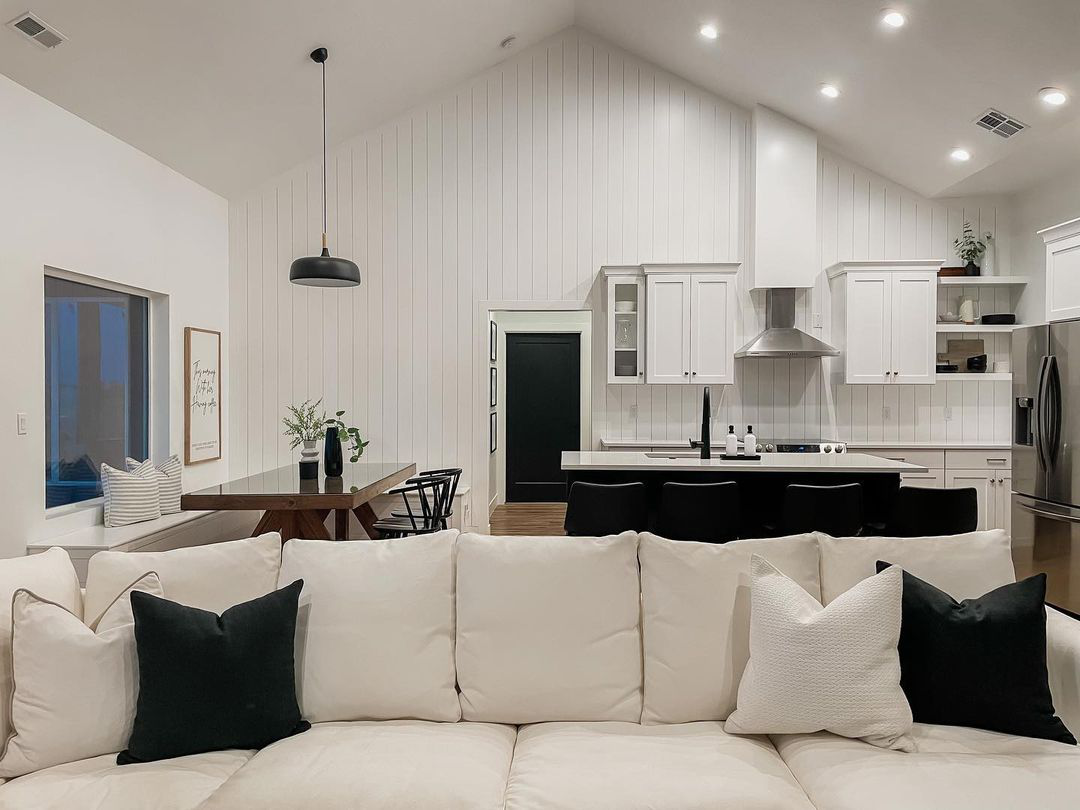

In [8]:
image_fn = r"sample_room.jpg"
image = Image.open(image_fn)
image

In [11]:
from pprint import pprint
res = run_inference(image, model, processor)
pprint(res)

('a white shiplap accent wall runs along the back wall of this kitchen. a '
 'dining room table with a black and white table and chairs is placed in front '
 'of a kitchen with a white shiplap wall. a black pendant light hangs from the '
 'ceiling above.')
